In [1]:
# import ROOT , time , os, sys , math , datetime
# from ROOT import TPlots, TAnalysis, TAnalysisEG2 , TEG2dm , TCalcPhysVarsEG2 , TSchemeDATA ,GenerateEvents
# sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
# sys.path.insert(0, '/home/erez/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
# sys.path.insert(0, '../../GSIMulation')
# import matplotlib as mpl, pandas as pd , numpy as np
# from matplotlib import pyplot as plt
# %matplotlib inline
# dm = TEG2dm()
from notebook_tools import *
%matplotlib inline

In [2]:
def draw_projection_theta_phi(h,name,cmap='hot_r'):
    hProjYZ = h.Project3D("yz")
    hThetaPhi = hProjYZ.Clone("hThetaPhi")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsTheta = hThetaPhi.GetXaxis().GetNbins()
    NbinsPhi = hThetaPhi.GetYaxis().GetNbins()
    H = np.ones((NbinsTheta, NbinsPhi))
    for bin_theta in range(NbinsTheta):
        for bin_phi in range(NbinsPhi):
            bin_content = float(hThetaPhi.GetBinContent(bin_theta,bin_phi)) / (30*100)
            H[bin_theta][bin_phi]= bin_content 
    extent = [0,120,-30,330]
    im = plt.imshow(H,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(H == 0, H), cmap=cmap, interpolation='none', origin='lower', extent=extent)
    ax.set_xlabel('$\\theta(p)$ [deg.]',fontsize=25)
    ax.set_ylabel('$\\phi(p)$ [deg.]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')
    cb = plt.colorbar()
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(20)
    outfile_name = "/Users/erezcohen/Desktop/acceptance_theta_phi_%s.pdf"%name
    plt.savefig( outfile_name )
    return H,extent


def draw_projections_theta_phi(extent,histograms,names,cmaps):
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    for H,name,cmap in zip(histograms,names,cmaps):
#         im = plt.imshow(H,interpolation='none', cmap=cmap,origin='lower', extent=extent)
        threshold = 0 if 'all' in name else 0.2
        im = ax.imshow(np.ma.masked_where(H < threshold , H), cmap=cmap, interpolation='none', origin='lower', extent=extent)
    ax.set_xlabel('$\\theta(p)$ [deg.]',fontsize=25)
    ax.set_ylabel('$\\phi(p)$ [deg.]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')
#     cb = plt.colorbar()
#     for t in cb.ax.get_yticklabels():
#          t.set_fontsize(20)
    outfile_name = "/Users/erezcohen/Desktop/projections_theta_phi.pdf"
    plt.savefig( outfile_name )



In [3]:
def draw_projection_mag(h):
    hProjYZ = h.Project3D("yz")
    hThetaPhi = hProjYZ.Clone("hThetaPhi")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsTheta = hThetaPhi.GetXaxis().GetNbins()
    NbinsPhi = hThetaPhi.GetYaxis().GetNbins()
    hProjX = h.Project3D("x")
    hMag = hProjX.Clone("hMag")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsMag = hMag.GetXaxis().GetNbins()
    H = np.ones(NbinsMag)
    for bin_mag in range(NbinsMag):
        bin_content = float(hMag.GetBinContent(bin_mag)) / (NbinsTheta*NbinsPhi)
        H[bin_mag]= bin_content 
    im = plt.hist(H)
    ax.set_xlabel('|p| [Gev/c]',fontsize=25)
    ax.set_ylabel('acceptance [%]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')

In [4]:
# acceptance with no fiducials...
pAcceptacneFile = ROOT.TFile("/Users/erezcohen/Desktop/DataMining/GSIM_DATA/PrecoilAcceptance.root")
h = pAcceptacneFile.Get("hRescaled")
hAcceptanceAll = h.Clone("hAcceptanceAll")
hAcceptanceFiducial = h.Clone("hAcceptanceFiducial")
    
p_recoil = ROOT.TVector3()
for binx in range(h.GetXaxis().GetNbins()): # p(recoil) magnitude
    p_recoil_mag = h.GetXaxis().GetBinCenter(binx)
        
    for biny in range(h.GetYaxis().GetNbins()): # p(recoil) theta
        p_recoil_theta = h.GetYaxis().GetBinCenter(biny)
            
        for binz in range(h.GetZaxis().GetNbins()): # p(recoil) phi
            p_recoil_phi = h.GetZaxis().GetBinCenter(binz)
                
            p_recoil.SetMagThetaPhi( p_recoil_mag , math.radians(p_recoil_theta) , math.radians(p_recoil_phi) )
            fiducial = dm.protonFiducial ( p_recoil , 1 )
            acceptance = h.GetBinContent(binx,biny,binz)
            hAcceptanceFiducial.SetBinContent( binx, biny, binz, acceptance if fiducial else 0 )



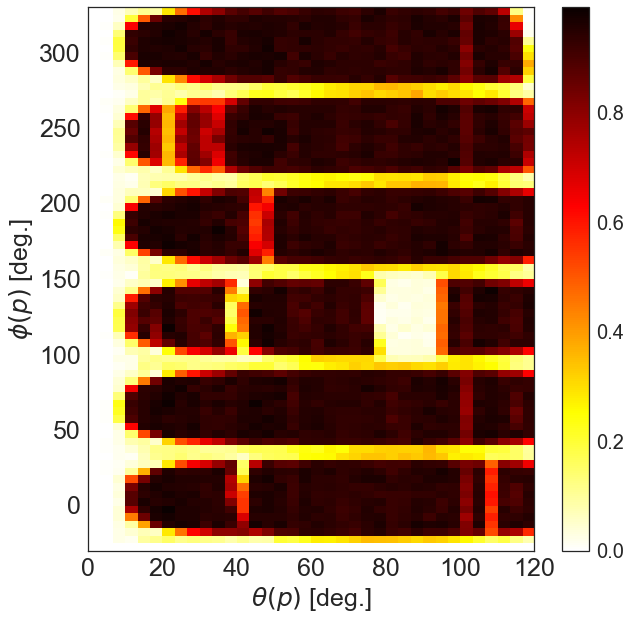

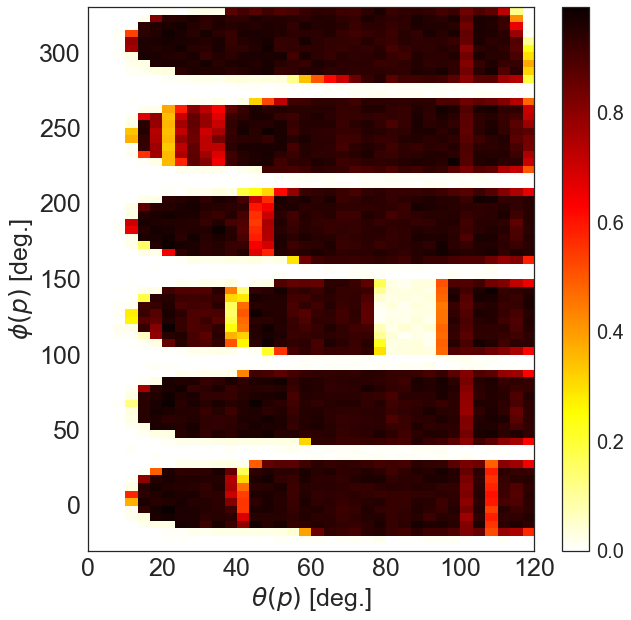

In [5]:
Hall , extent = draw_projection_theta_phi( hAcceptanceAll , "full_acceptance" )
Hfv , extent = draw_projection_theta_phi( hAcceptanceFiducial , "fiducial_region" )

# Or: do it in bins of p

In [13]:
def draw_projection_theta_phi_Pbin(h,name,cmap='hot_r'):
    hProjYZ = h.Project3D("yz")
    hThetaPhi = hProjYZ.Clone("hThetaPhi")
    fig = plt.figure(figsize=[10,5])
    fig, ax = plt.subplots(1,1, figsize=(10,10), subplot_kw={'aspect':'equal'})
    NbinsTheta = hThetaPhi.GetXaxis().GetNbins()
    NbinsPhi = hThetaPhi.GetYaxis().GetNbins()
    H = np.ones((NbinsTheta, NbinsPhi))
    for bin_theta in range(NbinsTheta):
        for bin_phi in range(NbinsPhi):
            bin_content = float(hThetaPhi.GetBinContent(bin_theta,bin_phi)) / (30*100)
            H[bin_theta][bin_phi]= bin_content 
    extent = [0,120,-30,330]
    im = plt.imshow(H,interpolation='none', cmap='hot_r',origin='lower', extent=extent)
    im = ax.imshow(np.ma.masked_where(H == 0, H), cmap=cmap, interpolation='none', origin='lower', extent=extent)
    ax.set_xlabel(r'$\theta(p)$ [deg.]',fontsize=25)
    ax.set_ylabel(r'$\phi(p)$ [deg.]',fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(25) 
    ax.set_aspect('auto')
    cb = plt.colorbar()
    for t in cb.ax.get_yticklabels():
         t.set_fontsize(20)
    #     outfile_name = "/Users/erezcohen/Desktop/acceptance_theta_phi_%s.pdf"%name
    #     plt.savefig( outfile_name )
    #     print 'saved',outfile_name
    return H,extent

In [95]:
print 'h.GetXaxis().GetNbins():',h.GetXaxis().GetNbins()
print 'h.GetYaxis().GetNbins():',h.GetYaxis().GetNbins()
print 'h.GetZaxis().GetNbins():',h.GetZaxis().GetNbins()
print 'number of lines in the table: ',(h.GetXaxis().GetNbins()*h.GetYaxis().GetNbins()*h.GetZaxis().GetNbins())

h.GetXaxis().GetNbins(): 30
h.GetYaxis().GetNbins(): 36
h.GetZaxis().GetNbins(): 72
number of lines in the table:  77760


P bin center: 0.339166666667
P bin center: 0.360833333333
done 0.34 < 0.35 <0.36 GeV/c
acceptance_max: 100.0
p_recoil_theta_max: 8.33333333333
p_recoil_phi_max: 57.5
Pbin_dw_err 0.0120833333333
P bin center: 0.4475
P bin center: 0.469166666667
done 0.44 < 0.45 <0.46 GeV/c
acceptance_max: 100.0
p_recoil_theta_max: 8.33333333333
p_recoil_phi_max: 57.5
P bin center: 0.534166666667
P bin center: 0.555833333333
Pbin_up_err 0.01375
done 0.54 < 0.55 <0.56 GeV/c
acceptance_max: 100.0
p_recoil_theta_max: 8.33333333333
p_recoil_phi_max: 57.5


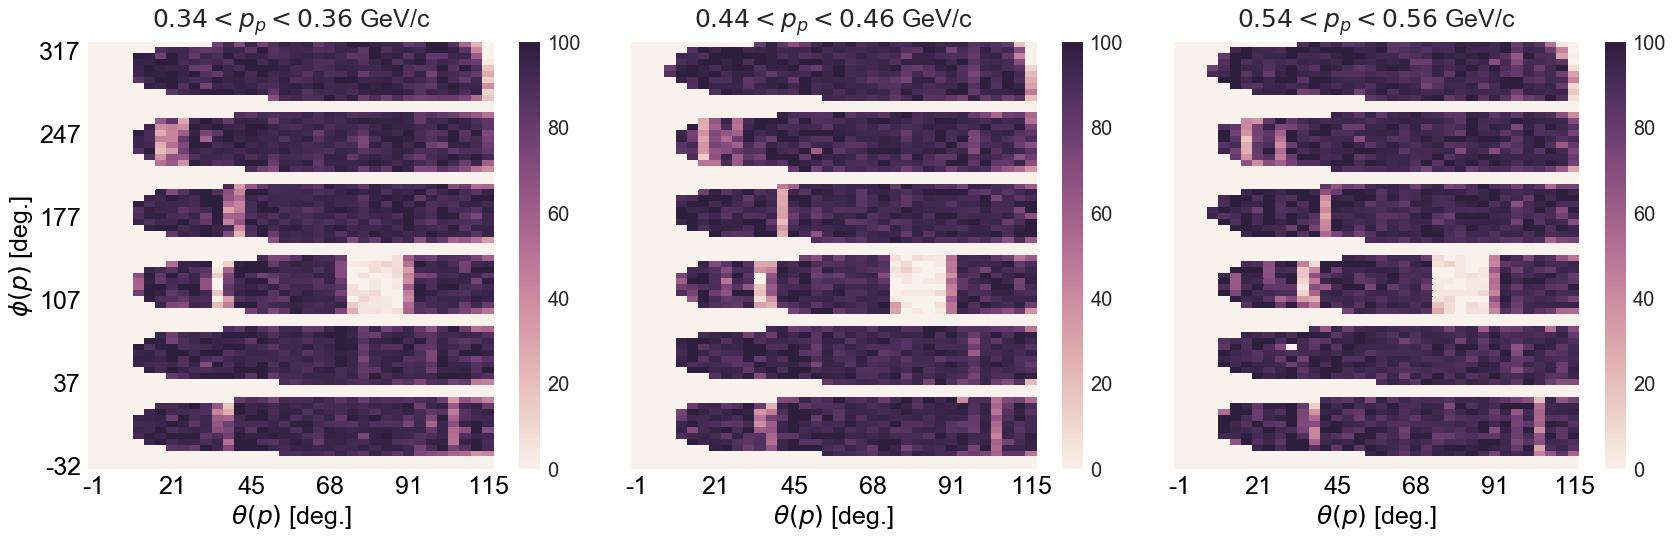

In [93]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(24,8))

# tick labels
Ptheta_centers = []
Pphi_centers = []
for biny in range(h.GetYaxis().GetNbins()): # p(recoil) theta
    Ptheta_centers.append(h.GetYaxis().GetBinCenter(biny))
xticks = ['%d'%x for x in Ptheta_centers]
keptticks = xticks[::int(len(xticks)/5)]
xticks = ['' for x in xticks]
xticks[::int(len(xticks)/5)] = keptticks

for binz in range(h.GetZaxis().GetNbins()): # p(recoil) phi
    Pphi_centers.append(h.GetZaxis().GetBinCenter(binz))
yticks = ['%d'%y for y in Pphi_centers]
keptticks = yticks[::int(len(yticks)/5)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/5)] = keptticks


acceptance_max=0
for i_Pbin,Pbin_center in enumerate([0.35,0.45,0.55]
                                   ):
    hAccFidPbin = np.zeros((h.GetNbinsY(),h.GetNbinsZ()))
    p_recoil = ROOT.TVector3()
    for binx in range(h.GetXaxis().GetNbins()): # p(recoil) magnitude
        p_recoil_mag = h.GetXaxis().GetBinCenter(binx)
        if np.abs(Pbin_center - p_recoil_mag)<0.02:
            print 'P bin center:',p_recoil_mag
        elif np.abs(Pbin_center - p_recoil_mag)<0.03:
            if p_recoil_mag<Pbin_center:
                Pbin_dw_err = np.abs(Pbin_center - p_recoil_mag)/2
                print 'Pbin_dw_err',Pbin_dw_err
            elif p_recoil_mag>Pbin_center:
                Pbin_up_err = np.abs(Pbin_center - p_recoil_mag)/2
                print 'Pbin_up_err',Pbin_up_err
            continue
        else: 
            continue
        for biny in range(h.GetYaxis().GetNbins()): # p(recoil) theta
            p_recoil_theta = h.GetYaxis().GetBinCenter(biny)

            for binz in range(h.GetZaxis().GetNbins()): # p(recoil) phi
                p_recoil_phi = h.GetZaxis().GetBinCenter(binz)
                
                p_recoil.SetMagThetaPhi( p_recoil_mag , math.radians(p_recoil_theta) , math.radians(p_recoil_phi) )
                fiducial = dm.protonFiducial ( p_recoil , 1 )
                acceptance = h.GetBinContent(binx,biny,binz)
                hAccFidPbin[biny][binz] = acceptance if fiducial else 0
                if acceptance>acceptance_max: 
                    p_recoil_theta_max = p_recoil_theta
                    p_recoil_phi_max = p_recoil_phi
                    acceptance_max=acceptance
    print 'done %.2f < %.2f <%.2f GeV/c'%((Pbin_center-Pbin_dw_err),Pbin_center,(Pbin_center+Pbin_up_err))
    
    ax = fig.add_subplot(1,3,i_Pbin+1)
    
    sns.heatmap(hAccFidPbin.T
                ,annot=False
                ,xticklabels=xticks
                ,yticklabels=yticks
                ,cbar=True);
    set_axes(ax
             ,title=r'$%.2f < p_p <%.2f$ GeV/c'%((Pbin_center-Pbin_dw_err),(Pbin_center+Pbin_up_err))         
             ,x_label=r'$\theta(p)$ [deg.]'                   
             ,y_label=r'$\phi(p)$ [deg.]'   if i_Pbin==0 else ''               
            )
    ax.invert_yaxis()    
    plt.yticks(rotation=0);
    if i_Pbin>0: ax.get_yaxis().set_major_formatter(NullFormatter())
    print 'acceptance_max:',acceptance_max
    print 'p_recoil_theta_max:',p_recoil_theta_max
    print 'p_recoil_phi_max:',p_recoil_phi_max    
        
plt.tight_layout()

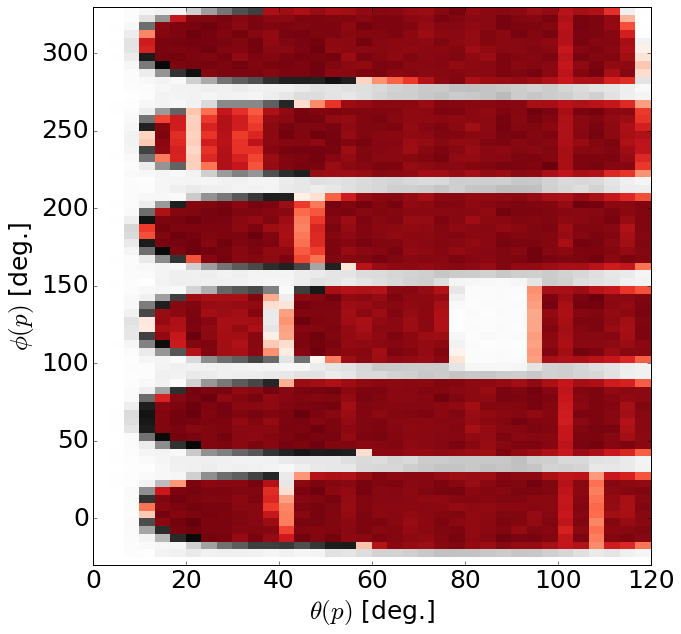

In [6]:
draw_projections_theta_phi( extent=extent,histograms=[Hall,Hfv] , names=["all","fv"] , cmaps=['Greys','Reds'])

# acceptance from GSIM run 0001

In [12]:
branches = ['protons.P()'] 
# ana_eep = TAnalysisEG2( path+"/AnaFiles" , "Ana_eep_in_ppSRCcut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
ana = root2array(filenames="/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_GSIM_run0001_eep.root",treename='anaTree' , branches=branches , selection=None )
# ana = TAnalysisEG2( path+"/AnaFiles" , "Ana_ppSRCCut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
# anarr = tree2array( ana.GetTree() , branches=variables , selection=None )
# df = read_root( "/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_GSIM_run0001_eep.root" , columns=columns)
data = pd.DataFrame({'p':np.concatenate(ana['protons.P()'])})

In [13]:
len(data)

1027

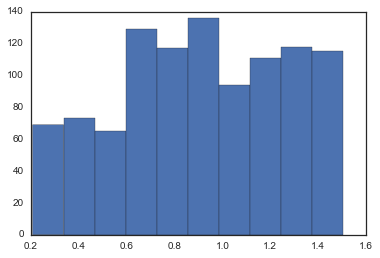

In [14]:
plt.hist(data.p);